In [1]:
from sklearn import tree

In [2]:
X = [[0, 0], [1,1]]
Y = [0, 1]

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [4]:
clf.predict([[2.,2.]])

array([1])

In [5]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree

In [7]:
X, y = load_iris(return_X_y = True)

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

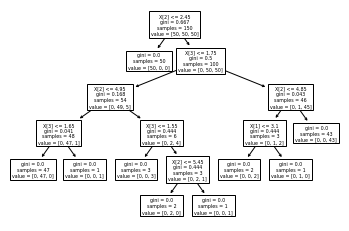

In [11]:
tree.plot_tree(clf)

In [12]:
import graphviz

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

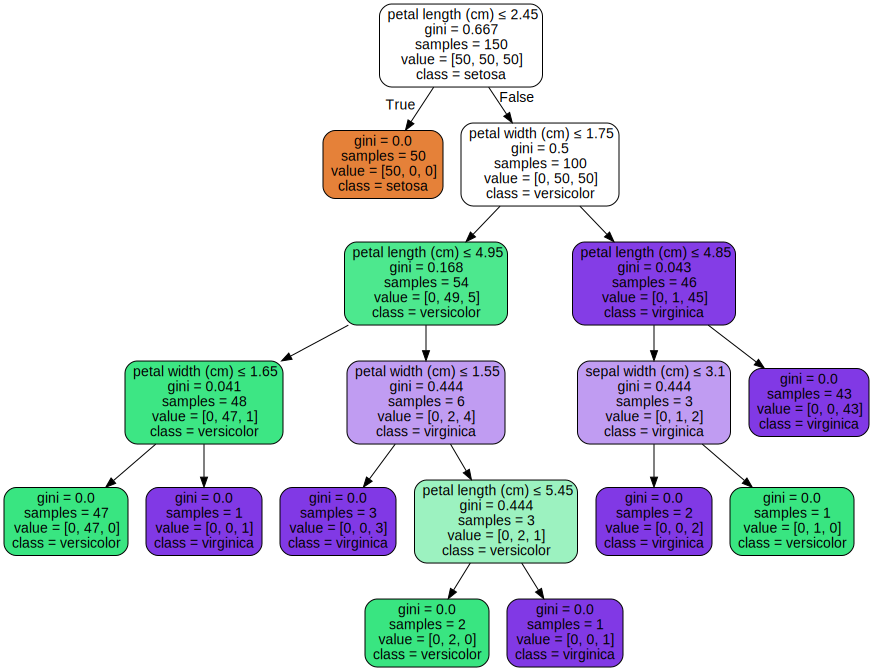

In [23]:
iris = load_iris()
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names = iris.feature_names,
                               class_names = iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state = 0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



# Decision Tree Classifier(use play_tennis data)

In [135]:
import pandas as pd
import numpy as np

In [136]:
df = pd.read_csv('play_tennis.csv')

In [137]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [138]:
df.drop('day', axis=1, inplace=True)

In [194]:
df

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [195]:
from sklearn.preprocessing import LabelEncoder

In [196]:
LE = LabelEncoder()
df['outlook'] = LE.fit_transform(df['outlook'])
df['temp'] = LE.fit_transform(df['temp'])
df['humidity'] = LE.fit_transform(df['humidity'])
df['wind'] = LE.fit_transform(df['wind'])
df['play'] = LE.fit_transform(df['play'])

In [197]:
df

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [198]:
X_data = np.array(df.iloc[:,0:4])
Y_data = np.array(df['play'])

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3)

In [202]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, Y_train)

In [204]:
predict = clf.predict(X_test)

In [205]:
predict

array([0, 0, 0, 1, 0])

In [206]:
from sklearn.metrics import accuracy_score

In [207]:
print(accuracy_score(predict, Y_test))

0.6


In [208]:
feature_names = df.iloc[:,0:4].columns.tolist()

In [209]:
target_names = np.array(['Y','N'])

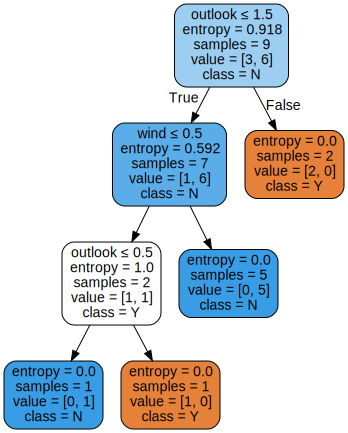

In [210]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names = feature_names,
                               class_names = target_names,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph